## Notebook to analyse metadata 
- To get statestic about the PC-GITA dataset 
- To use the gender and age in analyze_signal

In [1]:
%run project_setup.py 

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from constants import personal_path_to_PC_GITA, PD_color, HC_color
from functions import plot_histogram

In [2]:
metadata_path = os.path.join(personal_path_to_PC_GITA,'PCGITA_metadata.xlsx')
metadata = pd.read_excel(metadata_path)
display(metadata)

,RECODING ORIGINAL NAME,UPDRS,UPDRS-speech,H/Y,SEX,AGE,time after diagnosis
0,AVPEPUDEA0001,28.0,1.0,2.0,M,64,3.0
1,AVPEPUDEA0002,19.0,0.0,1.0,F,72,2.5
2,AVPEPUDEA0003,52.0,2.0,3.0,F,75,3.0
3,AVPEPUDEA0005,32.0,1.0,2.0,M,65,12.0
4,AVPEPUDEA0006,28.0,1.0,2.0,F,66,4.0
...,...,...,...,...,...,...,...
95,AVPEPUDEAC0051,NaN,NaN,NaN,M,31,NaN
96,AVPEPUDEAC0052,NaN,NaN,NaN,M,42,NaN
97,AVPEPUDEAC0053,NaN,NaN,NaN,F,50,NaN
98,AVPEPUDEAC0054,NaN,NaN,NaN,F,49,NaN


In [3]:
# Average age 
print(f"Average age is {np.average(metadata['AGE'])}")

HC = metadata[metadata['RECODING ORIGINAL NAME'].str.contains("C")]
PD = metadata[~metadata['RECODING ORIGINAL NAME'].str.contains("C")]

print(f"We have {len(HC)} healthy and {len(PD)} Parkinsons Patients. ")

# Seperate data for men and women 
women = metadata[metadata['SEX'] == 'F']
men = metadata[metadata['SEX'] == 'M']
print(f"We have {len(women)} women and {len(men)} men. ")

print(f"Average age for women is {np.average(women['AGE'])}")
print(f"Average age for men is {np.average(men['AGE'])}")

print(f"Average age for HC is {np.average(HC['AGE'])}")
print(f"Average age for PD is {np.average(PD['AGE'])}")



Average age is 61.0
We have 50 healthy and 50 Parkinsons Patients. 
We have 50 women and 50 men. 
Average age for women is 61.08
Average age for men is 60.92
Average age for HC is 60.98
Average age for PD is 61.02


In [4]:
# In HC: 
HC_women = HC[HC['SEX'] == 'F']
HC_men = HC[HC['SEX'] == 'M']
print(f"We have {len(HC_women)} women and {len(HC_men)} men in the healthy group. ")

print(f"Average age for women in healthy group is {np.average(HC_women['AGE'])}")
print(f"Average age for men in healthy group  is {np.average(HC_men['AGE'])}")
print(" ")

# In PD: 
PD_women = PD[PD['SEX'] == 'F']
PD_men = PD[PD['SEX'] == 'M']
print(f"We have {len(PD_women)} women and {len(PD_men)} men in the healthy group. ")

print(f"Average age for women in PD group is {np.average(PD_women['AGE'])}")
print(f"Average age for men in PD group  is {np.average(PD_men['AGE'])}")



We have 25 women and 25 men in the healthy group. 
Average age for women in healthy group is 61.44
Average age for men in healthy group  is 60.52
 
We have 25 women and 25 men in the healthy group. 
Average age for women in PD group is 60.72
Average age for men in PD group  is 61.32


In [5]:
# Test that the values is the same 
print("avg age PD", round((np.average(PD_women['AGE'])  + np.average(PD_men['AGE']))/2, 2))
print("avg age HC", round((np.average(HC_women['AGE'])  + np.average(HC_men['AGE']))/2, 2))


print("avg age female", round((np.average(PD_women['AGE'])  + np.average(HC_women['AGE']))/2, 2))
print("avg age male", round((np.average(HC_men['AGE'])  + np.average(PD_men['AGE']))/2, 2))

avg age PD 61.02
avg age HC 60.98
avg age female 61.08
avg age male 60.92


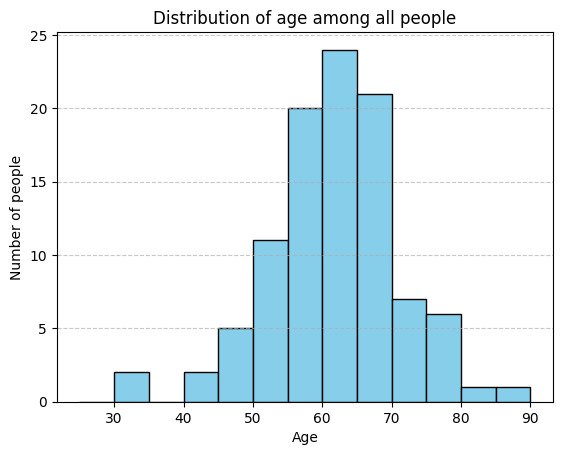

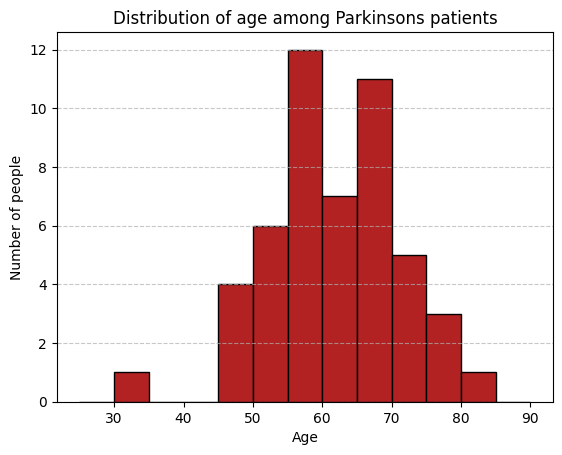

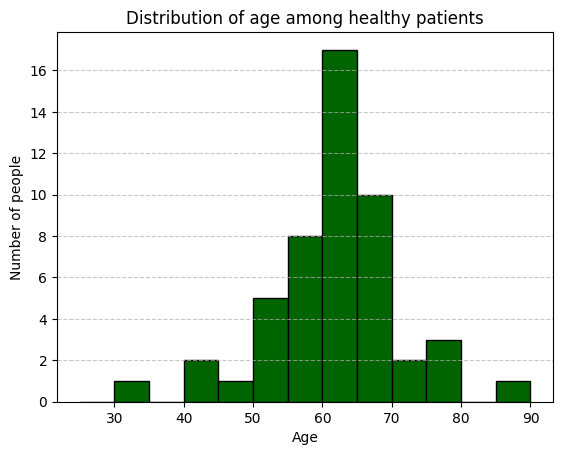

In [6]:
plot_histogram(metadata["AGE"], "Age", "Distribution of age among all people", bins=list(range(25, 95, 5)))
plot_histogram(PD["AGE"], "Age", "Distribution of age among Parkinsons patients", color=PD_color, bins=list(range(25, 95, 5)))
plot_histogram(HC["AGE"], "Age", "Distribution of age among healthy patients", color=HC_color, bins=list(range(25, 95, 5)))


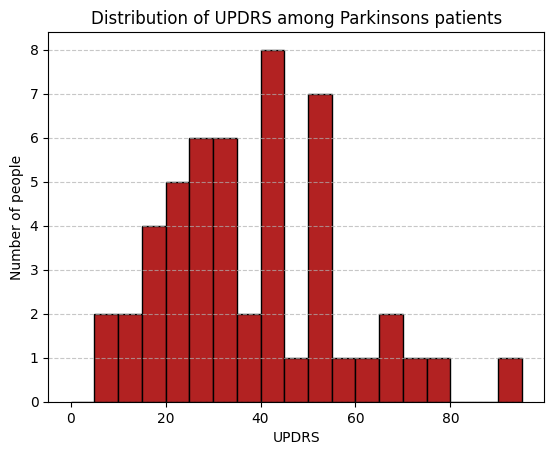

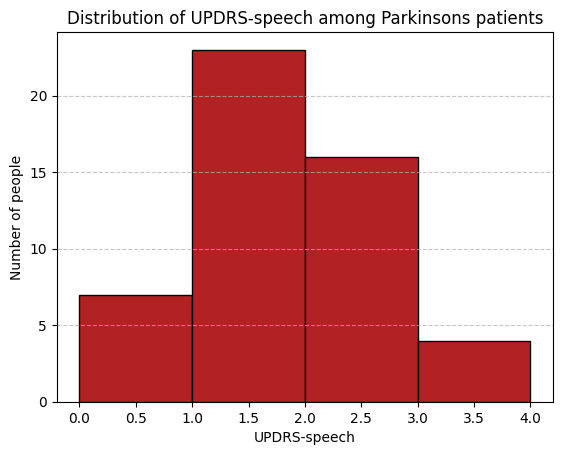

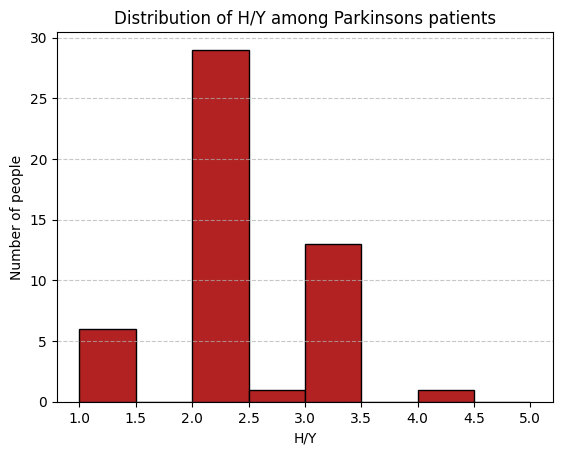

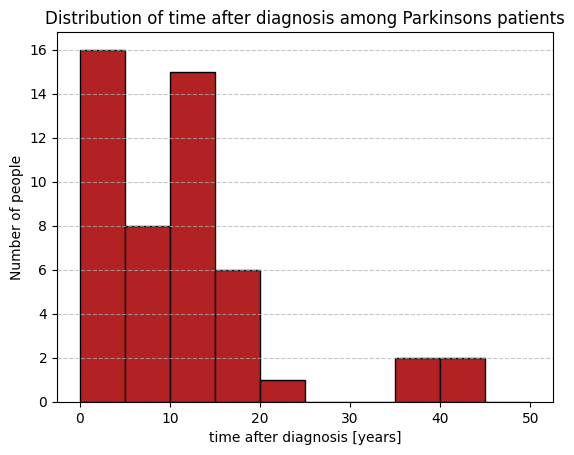

In [7]:
# PD info: 
plot_histogram(PD["UPDRS"], "UPDRS", "Distribution of UPDRS among Parkinsons patients", color=PD_color, bins=list(range(0, 100, 5)))
plot_histogram(PD["UPDRS-speech"], "UPDRS-speech", "Distribution of UPDRS-speech among Parkinsons patients", color=PD_color, bins=[0.0, 1.0, 2.0, 3.0, 4])
plot_histogram(PD["H/Y"], "H/Y", "Distribution of H/Y among Parkinsons patients", color=PD_color, bins=[1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4, 4.5, 5])
plot_histogram(PD["time after diagnosis"], "time after diagnosis [years]", "Distribution of time after diagnosis among Parkinsons patients", color=PD_color, bins = list(range(0, 55, 5)))




In [8]:
def plot_histogram_together(data, labels, xlabel, title, colors, bins = False):
    if bins: 
        plt.hist(data, stacked=True, label=labels, edgecolor = "black", color = colors, bins=bins)
    else:
        plt.hist(data, stacked=True, label=labels, edgecolor = "black", color = colors)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Number of people')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend()
    plt.show()

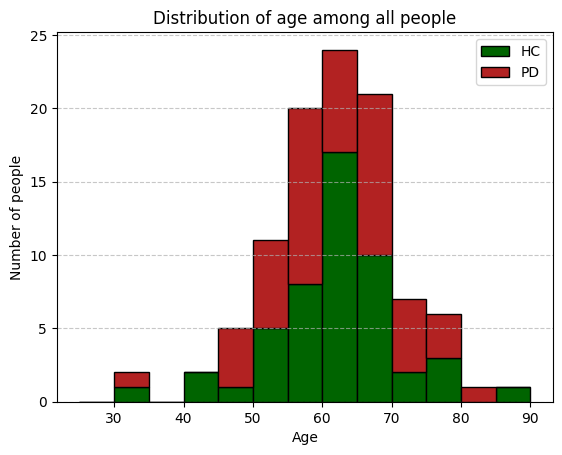

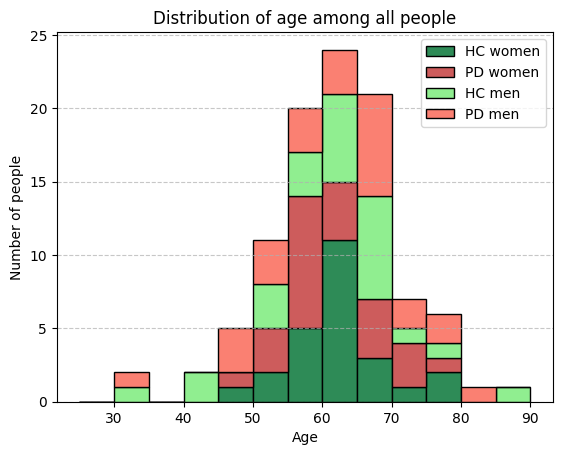

In [9]:
plot_histogram_together([HC["AGE"], PD["AGE"]], ["HC", "PD"], "Age", "Distribution of age among all people", [HC_color, PD_color], bins=list(range(25, 95, 5)))
plot_histogram_together([HC_women["AGE"], PD_women["AGE"], HC_men["AGE"], PD_men["AGE"]], ["HC women", "PD women", "HC men", "PD men"], "Age", "Distribution of age among all people", ["SeaGreen", "IndianRed", "LightGreen", "Salmon"], bins=list(range(25, 95, 5)))